# 📁 New Repository Structure

**Configuration files have been moved to be more accessible:**

- **Tool Config**: `config/tools.yaml` (was `src/config/tools/config.yaml`)
- **MCP Servers**: `config/mcp_servers/*.json` (was `src/mcp_integration/servers/*.json`)

**Benefits:**
- ✅ Easy to find at project root level
- ✅ Clear separation of config vs code
- ✅ Auto-discovery still works

**To view available tools:**
```bash
python -m src.config.tools.registry
```

---


# Agents & Memory Systems Testing

This notebook tests all available agent types and memory backends.

## What's Available

### Agent Types
1. **Simple ReAct Agent** - Fast, simple reasoning + acting
2. **Complex LangGraph Agent** - Advanced multi-node workflow with reflection
3. **HR Agent** - Existing specialized HR agent (default)

### Memory Types
1. **Buffer** - Simple conversation buffer
2. **Summary** - Conversation summary
3. **PostgreSQL** - Persistent PostgreSQL checkpointer
4. **SQLite** - Local file-based checkpointer
5. **Memory** - In-memory checkpointer
6. **OpenMemory** - Self-hosted AI memory engine (NEW!)

## Setup

In [3]:
import sys
from pathlib import Path

# Add project root to path
project_root = Path.cwd().parent.parent
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

import logging
logging.basicConfig(level=logging.INFO)

print(f"✅ Project root: {project_root}")

✅ Project root: /home/shamaseen/Desktop/Projects/personal/Langchain/tutorial/whatsapp_hr_assistant


## Part 1: Explore Available Options

In [4]:
from src.agents.factory import AgentFactory, AgentType, MemoryType

print("="*80)
print("AVAILABLE AGENTS")
print("="*80)

for agent_type in AgentType:
    info = AgentFactory.get_agent_info(agent_type)
    print(f"\n📦 {info['name']} ({agent_type.value})")
    print(f"   Description: {info['description']}")
    print(f"   Best for: {info['best_for']}")
    print(f"   Features:")
    for feature in info['features']:
        print(f"     • {feature}")
    
    # Show compatible memories
    compatible = AgentFactory.list_compatible_memories(agent_type)
    print(f"   Compatible memory: {', '.join([m.value for m in compatible])}")
    
    recommended = AgentFactory.get_recommended_memory(agent_type)
    print(f"   Recommended: {recommended.value}")

AVAILABLE AGENTS

📦 Simple ReAct Agent (simple_react)
   Description: Straightforward ReAct (Reasoning + Acting) agent
   Best for: Simple tasks, quick responses, debugging
   Features:
     • Clear reasoning steps
     • Simple conversation memory
     • Easy to understand and debug
     • Fast execution
   Compatible memory: buffer, summary, openmemory
   Recommended: buffer

📦 Complex LangGraph Agent (complex_langgraph)
   Description: Advanced multi-node graph agent with reflection
   Best for: Complex workflows, multi-step tasks, production use
   Features:
     • Multi-node workflow graph
     • Conditional routing
     • Self-reflection and critique
     • Persistent memory via checkpointer
     • Error handling and recovery
   Compatible memory: postgres, sqlite, memory
   Recommended: postgres

📦 HR Recruitment Agent (hr_agent)
   Description: Existing specialized HR agent
   Best for: HR recruitment tasks
   Features:
     • Recruitment-specific workflows
     • CV processing

In [5]:
print("\n" + "="*80)
print("AVAILABLE MEMORY TYPES")
print("="*80)

for memory_type in MemoryType:
    info = AgentFactory.get_memory_info(memory_type)
    print(f"\n💾 {info['name']} ({memory_type.value})")
    print(f"   Description: {info['description']}")
    print(f"   Use case: {info['use_case']}")
    print(f"   Pros: {', '.join(info['pros'])}")
    print(f"   Cons: {', '.join(info['cons'])}")


AVAILABLE MEMORY TYPES

💾 Conversation Buffer (buffer)
   Description: Stores full conversation history in memory
   Use case: Short conversations, testing
   Pros: Simple, Fast, Complete history
   Cons: Limited by context window, No persistence

💾 Conversation Summary (summary)
   Description: Summarizes conversation to save tokens
   Use case: Long conversations, token optimization
   Pros: Token efficient, Handles long conversations
   Cons: May lose details, Extra LLM calls

💾 PostgreSQL Checkpointer (postgres)
   Description: Persistent storage in PostgreSQL
   Use case: Production, multi-user applications
   Pros: Persistent, Scalable, Multi-user
   Cons: Requires database, More complex setup

💾 SQLite Checkpointer (sqlite)
   Description: Local file-based persistent storage
   Use case: Development, single-user apps
   Pros: Persistent, No external DB, Simple
   Cons: Single-user, File-based limitations

💾 In-Memory Checkpointer (memory)
   Description: Temporary in-memory sto

## Part 2: Test Simple ReAct Agent

In [6]:
from langchain_google_genai import ChatGoogleGenerativeAI
from src.config import settings
from src.agents.tool_factory import get_tools

# Create LLM
llm = ChatGoogleGenerativeAI(
    model=settings.MODEL_NAME,
    google_api_key=settings.GOOGLE_API_KEY,
    temperature=0.7
)

# Get tools
tools = get_tools()

print(f"✅ LLM created: {settings.MODEL_NAME}")
print(f"✅ Tools loaded: {len(tools)} tools")

INFO:src.tools.loader:🔧 Loading tools from configuration...
INFO:src.tools.loader:   Found 9 tool configurations
INFO:src.tools.loader:   📦 Loading internal MCP tool: gmail
INFO:src.tools.loader:   💡 Available internal tools: datetime, calendar, webex
INFO:src.tools.loader:   📦 Loading internal MCP tool: calendar
INFO:src.tools.loader:   ✓ Loaded calendar from /home/shamaseen/Desktop/Projects/personal/Langchain/tutorial/whatsapp_hr_assistant/src/tools/google/calendar_mcp.py
INFO:src.tools.loader:   📦 Loading internal MCP tool: cv_sheet_manager
INFO:src.tools.loader:   💡 Available internal tools: datetime, calendar, webex
INFO:src.tools.loader:   📦 Loading internal MCP tool: process_cvs
INFO:src.tools.loader:   💡 Available internal tools: datetime, calendar, webex
INFO:src.tools.loader:   📦 Loading internal MCP tool: search_candidates
INFO:src.tools.loader:   💡 Available internal tools: datetime, calendar, webex
INFO:src.tools.loader:   📦 Loading internal MCP tool: search_create_sheet
I

🔧 Loading tools from dynamic configuration
   Config: src/config/tools.yaml
   ✗ Stdio connection failed: fileno
   ⟳ [datetime] Connection retry 1/3
      Error: fileno
      Waiting 0.7s before retry...
   ✗ Stdio connection failed: fileno
   ⟳ [datetime] Connection retry 2/3
      Error: fileno
      Waiting 1.2s before retry...


ERROR:src.tools.loader:   ❌ Failed to connect to datetime MCP server: fileno
INFO:src.tools.loader:   🌐 Loading MCP client tool: thinking
INFO:src.tools.loader:   📄 Using MCP config file: thinking.json


   ✗ Stdio connection failed: fileno
   ✗ Stdio connection failed: fileno
   ⟳ [thinking] Connection retry 1/3
      Error: fileno
      Waiting 0.6s before retry...
   ✗ Stdio connection failed: fileno
   ⟳ [thinking] Connection retry 2/3
      Error: fileno
      Waiting 1.7s before retry...


ERROR:src.tools.loader:   ❌ Failed to connect to thinking MCP server: fileno
INFO:src.tools.loader:   📦 Loading internal MCP tool: webex
INFO:src.tools.loader:   ✓ Loaded 2 tools for webex
INFO:src.tools.loader:
✅ Successfully loaded 2 tools (deduped from 3)


   ✗ Stdio connection failed: fileno

✅ Loaded 2 tools
   Active MCP clients: None
   Tool names: calendar, webex
✅ LLM created: gemini-2.5-flash
✅ Tools loaded: 2 tools


In [7]:
print("\n" + "="*80)
print("TESTING SIMPLE REACT AGENT WITH BUFFER MEMORY")
print("="*80)

# Create Simple ReAct agent
simple_agent = AgentFactory.create_agent(
    agent_type=AgentType.SIMPLE_REACT,
    llm=llm,
    tools=tools,
    memory_type=MemoryType.BUFFER,
    agent_config={
        "verbose": True,
        "max_iterations": 3
    }
)

print("\n✅ Simple ReAct Agent created")

# Test with simple query
result = simple_agent.invoke("What's the current date and time?",)


print("\n📊 Result:")
print(f"   Output: {result['output'][:200]}...")
print(f"   Success: {result['success']}")
print(f"   Intermediate steps: {len(result['intermediate_steps'])} steps")

INFO:src.agents.factory:Creating simple_react agent with buffer memory



TESTING SIMPLE REACT AGENT WITH BUFFER MEMORY


ModuleNotFoundError: No module named 'src.agents.implementations'

## Part 3: Test Complex LangGraph Agent

In [ ]:
print("\n" + "="*80)
print("TESTING COMPLEX LANGGRAPH AGENT WITH MEMORY CHECKPOINTER")
print("="*80)

# Create Complex LangGraph agent
complex_agent = AgentFactory.create_agent(
    agent_type=AgentType.COMPLEX_LANGGRAPH,
    llm=llm,
    tools=tools,
    memory_type=MemoryType.MEMORY_SAVER,  # In-memory for testing
    agent_config={
        "verbose": True,
        "max_iterations": 5,
        "enable_reflection": True
    }
)

print("\n✅ Complex LangGraph Agent created")

# Test with more complex query
result = complex_agent.invoke(
    "Plan a meeting for tomorrow at 2pm. Consider checking my calendar first.",
    thread_id="test_thread_1"
)

print("\n📊 Result:")
print(f"   Output: {result['output'][:300]}...")
print(f"   Success: {result['success']}")
print(f"   Iterations: {result['iterations']}")
if result.get('reflection'):
    print(f"   Reflection: {result['reflection'][:200]}...")

INFO:src.core.agents.agent_factory:Creating complex_langgraph agent with memory memory
INFO:src.core.agents.complex_langgraph_agent:Complex LangGraph Agent initialized with 9 tools



TESTING COMPLEX LANGGRAPH AGENT WITH MEMORY CHECKPOINTER

✅ Complex LangGraph Agent created


INFO:src.core.agents.complex_langgraph_agent:Plan created: Here's my understanding of your request:

You would like me to plan a meeting for tomorrow at 2:00 PM. Before proceeding with the meeting setup, you want me to check your calendar to ensure you are av...
INFO:src.core.agents.complex_langgraph_agent:Reflection: I understand. How can I help you?...



📊 Result:
   Output: ['Okay, I\'ve checked the current date and time, which is Friday, May 10, 2024, at 11:37 AM UTC.\n\nTherefore, "tomorrow" will be **Saturday, May 11, 2024**.\n\nNow, let\'s check your calendar to see if you\'re available at 2:00 PM on Saturday, May 11, 2024.\n\nACTION: use_tool\nTOOL: calendar\nINPUT: {"datetime_start": "2024-05-11T14:00:00", "datetime_end": "2024-05-11T15:00:00"}\nREASONING: I have the current date, so I can now determine tomorrow\'s date. The user wants to plan a meeting for tomorrow at 2 PM. Before proceeding, I need to check their calendar for availability. I will use the `calendar` tool to check for conflicts between 2 PM and 3 PM tomorrow.', 'Okay, I\'ve completed the checks!\n\nHere\'s a summary of what I did and what I found:\n\n1.  **Determined "Tomorrow\'s" Date**: I first established that "tomorrow" is Saturday, May 11, 2024, based on the current date and time.\n2.  **Checked Your Calendar**: I then used your calendar to see if you have

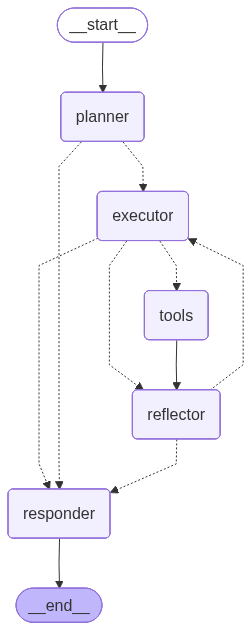

In [ ]:
from langchain_core.runnables.graph import CurveStyle, MermaidDrawMethod
from IPython.display import display, HTML, Image

display(
    Image(
        complex_agent.graph.get_graph().draw_mermaid_png(
            draw_method=MermaidDrawMethod.API,
        )
    )
)

## Part 4: Test OpenMemory Integration (if available)

In [ ]:
# Test OpenMemory connection
print("\n" + "="*80)
print("TESTING OPENMEMORY CONNECTION")
print("="*80)

from src.memory.openmemory import create_openmemory_client
import asyncio

async def test_openmemory():
    try:
        client = create_openmemory_client()
        healthy = await client.health_check()
        
        if healthy:
            print("✅ OpenMemory is healthy and accessible")
            
            # Test adding a memory
            result = await client.add_memory(
                content="Test memory from notebook",
                user_id="test_user",
                sector="episodic"
            )
            print(f"✅ Added memory: {result.get('id', 'unknown')}")
            
            # Test searching
            memories = await client.search_memories(
                query="test",
                user_id="test_user",
                limit=5
            )
            print(f"✅ Found {len(memories)} memories")
            
            await client.close()
            return True
        else:
            print("⚠️  OpenMemory not accessible")
            print("   Make sure OpenMemory is running at http://localhost:3000")
            return False
            
    except Exception as e:
        print(f"❌ OpenMemory error: {e}")
        print("   Install with: git clone https://github.com/CaviraOSS/OpenMemory.git")
        return False

openmemory_available = await test_openmemory()


TESTING OPENMEMORY CONNECTION
⚠️  OpenMemory not accessible
   Make sure OpenMemory is running at http://localhost:3000


In [ ]:
# Test agent with OpenMemory (if available)
if openmemory_available:
    print("\n" + "="*80)
    print("TESTING AGENT WITH OPENMEMORY")
    print("="*80)
    
    openmemory_agent = AgentFactory.create_agent(
        agent_type=AgentType.SIMPLE_REACT,
        llm=llm,
        tools=tools,
        memory_type=MemoryType.OPENMEMORY,
        memory_config={
            "user_id": "test_user_notebook",
            "max_context_messages": 10
        }
    )
    
    print("\n✅ Agent with OpenMemory created")
    
    # First interaction
    result1 = openmemory_agent.invoke("My name is Alice and I love Python programming")
    print(f"\n💬 Response 1: {result1['output'][:150]}...")
    
    # Second interaction (should remember)
    result2 = openmemory_agent.invoke("What programming language did I mention I like?")
    print(f"\n💬 Response 2: {result2['output'][:150]}...")
    
    # Check if it remembered
    if "python" in result2['output'].lower():
        print("\n✅ OpenMemory successfully remembered context!")
    else:
        print("\n⚠️  Memory recall uncertain")
else:
    print("\n⏭️  Skipping OpenMemory tests (not available)")


⏭️  Skipping OpenMemory tests (not available)


## Part 5: Compare Agent Performance

In [ ]:
import time

print("\n" + "="*80)
print("AGENT PERFORMANCE COMPARISON")
print("="*80)

test_query = "What's the current time?"

# Test Simple ReAct
print("\n1️⃣ Simple ReAct Agent:")
start = time.time()
result1 = simple_agent.invoke(test_query)
time1 = time.time() - start
print(f"   Time: {time1:.2f}s")
print(f"   Success: {result1['success']}")

# Test Complex LangGraph
print("\n2️⃣ Complex LangGraph Agent:")
start = time.time()
result2 = complex_agent.invoke(test_query, thread_id="perf_test")
time2 = time.time() - start
print(f"   Time: {time2:.2f}s")
print(f"   Success: {result2['success']}")
print(f"   Iterations: {result2['iterations']}")

# Summary
print("\n📊 Summary:")
print(f"   Simple ReAct: {time1:.2f}s")
print(f"   Complex LangGraph: {time2:.2f}s")
print(f"   Difference: {abs(time2 - time1):.2f}s")


AGENT PERFORMANCE COMPARISON

1️⃣ Simple ReAct Agent:


NameError: name 'simple_agent' is not defined

## Part 6: Memory Comparison

In [ ]:
print("\n" + "="*80)
print("MEMORY TYPE COMPARISON")
print("="*80)

memory_types_to_test = [
    (MemoryType.BUFFER, "Buffer Memory"),
    (MemoryType.SUMMARY, "Summary Memory"),
]

for mem_type, name in memory_types_to_test:
    print(f"\n🧪 Testing {name}:")
    
    try:
        agent = AgentFactory.create_agent(
            agent_type=AgentType.SIMPLE_REACT,
            llm=llm,
            tools=tools,
            memory_type=mem_type,
            agent_config={"verbose": False, "max_iterations": 2}
        )
        
        # First message
        result1 = agent.invoke("My favorite color is blue")
        
        # Second message (test memory)
        result2 = agent.invoke("What's my favorite color?")
        
        if "blue" in result2['output'].lower():
            print(f"   ✅ Memory works - remembered context")
        else:
            print(f"   ⚠️  Memory unclear")
            
    except Exception as e:
        print(f"   ❌ Error: {e}")

print("\n✅ Memory comparison complete!")

INFO:src.core.agents.agent_factory:Creating simple_react agent with buffer memory



MEMORY TYPE COMPARISON

🧪 Testing Buffer Memory:


/home/shamaseen/Desktop/Projects/personal/Langchain/tutorial/whatsapp_hr_assistant/src/core/agents/simple_react_agent.py:238: LangChainDeprecationWarning: Please see the migration guide at: https://python.langchain.com/docs/versions/migrating_memory/
  memory = ConversationBufferMemory(
INFO:src.core.agents.simple_react_agent:Simple ReAct Agent initialized with 9 tools
INFO:src.core.agents.agent_factory:Creating simple_react agent with summary memory
/home/shamaseen/Desktop/Projects/personal/Langchain/tutorial/whatsapp_hr_assistant/src/core/agents/simple_react_agent.py:246: LangChainDeprecationWarning: Please see the migration guide at: https://python.langchain.com/docs/versions/migrating_memory/
  memory = ConversationSummaryMemory(
INFO:src.core.agents.simple_react_agent:Simple ReAct Agent initialized with 9 tools


   ⚠️  Memory unclear

🧪 Testing Summary Memory:


* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 10
Please retry in 37.524803074s. [links {
  description: "Learn more about Gemini API quotas"
  url: "https://ai.google.dev/gemini-api/docs/rate-limits"
}
, violations {
}
, retry_delay {
  seconds: 37
}
].
* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 10
Please retry in 35.339731661s. [links {
  description: "Learn more about Gemini API quotas"
  url: "https://ai.google.dev/gemini-api/docs/rate-limits"
}
, violations {
}
, retry_delay {
  seconds: 35
}
].
* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 10
Please retry in 31.108349521s. [links {
  description: "Learn more about Gemini API quotas"
  url: "https://ai.google.dev/gemini-api/docs/rate-limits"
}
, violations {
}
, retry_delay {
  seconds: 31
}
].
* Quota exceeded for metric: generativelanguage.googlea

## Part 7: Configuration Example

In [ ]:
print("\n" + "="*80)
print("CONFIGURATION-BASED AGENT CREATION")
print("="*80)

from src.agents.factory import create_agent_from_config

# Example configurations
configs = [
    {
        "name": "Development Config",
        "agent_type": "simple_react",
        "memory_type": "buffer",
        "agent_config": {"verbose": True, "max_iterations": 3}
    },
    {
        "name": "Production Config",
        "agent_type": "complex_langgraph",
        "memory_type": "memory",  # Would be postgres in real production
        "agent_config": {"verbose": False, "enable_reflection": True}
    }
]

for config in configs:
    print(f"\n📋 {config['name']}:")
    print(f"   Agent: {config['agent_type']}")
    print(f"   Memory: {config['memory_type']}")
    
    try:
        agent = create_agent_from_config(config)
        print(f"   ✅ Agent created successfully")
    except Exception as e:
        print(f"   ❌ Error: {e}")

INFO:src.config.tool_loader:🔧 Loading tools from configuration...
INFO:src.config.tool_loader:   Found 9 tool configurations
INFO:src.config.tool_loader:   📦 Loading internal MCP tool: gmail
INFO:src.config.tool_loader:   💡 Available internal tools: datetime, calendar, webex
INFO:src.config.tool_loader:   📦 Loading internal MCP tool: calendar
INFO:src.config.tool_loader:   ✓ Loaded calendar
INFO:src.config.tool_loader:   📦 Loading internal MCP tool: cv_manager
INFO:src.config.tool_loader:   💡 Available internal tools: datetime, calendar, webex
INFO:src.config.tool_loader:   📦 Loading internal MCP tool: cv_processing
INFO:src.config.tool_loader:   💡 Available internal tools: datetime, calendar, webex
INFO:src.config.tool_loader:   🌐 Loading MCP client tool: datetime
INFO:src.config.tool_loader:   📄 Using MCP config file: datetime



CONFIGURATION-BASED AGENT CREATION

📋 Development Config:
   Agent: simple_react
   Memory: buffer
🔧 Using dynamic tool configuration mode
   Config: src/config/tool_config.yaml


INFO:src.config.tool_loader:   ✓ Loaded 2 tools from datetime MCP server
INFO:src.config.tool_loader:   🌐 Loading MCP client tool: thinking
INFO:src.config.tool_loader:   📄 Using MCP config file: thinking


   ✓ Stdio connected: 2 tool(s) loaded


INFO:src.config.tool_loader:   ✓ Loaded 4 tools from thinking MCP server
INFO:src.config.tool_loader:   📦 Loading internal MCP tool: webex
INFO:src.config.tool_loader:   ✓ Loaded 2 tools for webex
INFO:src.config.tool_loader:   ⏭️  Skipping disabled tool: filesystem
INFO:src.config.tool_loader:   ⏭️  Skipping disabled tool: custom_api
INFO:src.config.tool_loader:
✅ Successfully loaded 9 tools
INFO:src.core.agents.agent_factory:Creating simple_react agent with buffer memory
INFO:src.core.agents.simple_react_agent:Simple ReAct Agent initialized with 9 tools
INFO:src.config.tool_loader:🔧 Loading tools from configuration...
INFO:src.config.tool_loader:   Found 9 tool configurations
INFO:src.config.tool_loader:   📦 Loading internal MCP tool: gmail
INFO:src.config.tool_loader:   💡 Available internal tools: datetime, calendar, webex
INFO:src.config.tool_loader:   📦 Loading internal MCP tool: calendar
INFO:src.config.tool_loader:   ✓ Loaded calendar
INFO:src.config.tool_loader:   📦 Loading int

   ✓ Stdio connected: 4 tool(s) loaded

✅ Loaded 9 tools dynamically
   Active MCP clients: datetime, thinking
   Tool names: calendar, datetime_get_current_time, datetime_convert_time, thinking_enhancedthinking, thinking_sequentialthinking, thinking_reset_thinking_session, thinking_get_thinking_analytics, webex, webex
   ✅ Agent created successfully

📋 Production Config:
   Agent: complex_langgraph
   Memory: memory
🔧 Using dynamic tool configuration mode
   Config: src/config/tool_config.yaml


INFO:src.config.tool_loader:   ✓ Loaded 2 tools from datetime MCP server
INFO:src.config.tool_loader:   🌐 Loading MCP client tool: thinking
INFO:src.config.tool_loader:   📄 Using MCP config file: thinking


   ✓ Stdio connected: 2 tool(s) loaded


INFO:src.config.tool_loader:   ✓ Loaded 4 tools from thinking MCP server
INFO:src.config.tool_loader:   📦 Loading internal MCP tool: webex
INFO:src.config.tool_loader:   ✓ Loaded 2 tools for webex
INFO:src.config.tool_loader:   ⏭️  Skipping disabled tool: filesystem
INFO:src.config.tool_loader:   ⏭️  Skipping disabled tool: custom_api
INFO:src.config.tool_loader:
✅ Successfully loaded 9 tools
INFO:src.core.agents.agent_factory:Creating complex_langgraph agent with memory memory
INFO:src.core.agents.complex_langgraph_agent:Complex LangGraph Agent initialized with 9 tools


   ✓ Stdio connected: 4 tool(s) loaded

✅ Loaded 9 tools dynamically
   Active MCP clients: datetime, thinking
   Tool names: calendar, datetime_get_current_time, datetime_convert_time, thinking_enhancedthinking, thinking_sequentialthinking, thinking_reset_thinking_session, thinking_get_thinking_analytics, webex, webex
   ✅ Agent created successfully


## Summary

This notebook demonstrated:

✅ **Simple ReAct Agent** - Fast, simple, easy to understand
✅ **Complex LangGraph Agent** - Advanced with reflection and graph workflows
✅ **Multiple Memory Types** - Buffer, Summary, and OpenMemory
✅ **Performance Comparison** - Speed and capability trade-offs
✅ **Configuration System** - Easy switching between setups

## Next Steps

1. Configure your preferred agent in `.env`:
   ```bash
   AGENT_TYPE=simple_react  # or complex_langgraph, hr_agent
   MEMORY_TYPE=buffer       # or postgres, openmemory, etc.
   ```

2. For production, use:
   ```bash
   AGENT_TYPE=complex_langgraph
   MEMORY_TYPE=postgres
   DATABASE_URL=postgresql://...
   ```

3. For OpenMemory, see `docs/AGENT_MEMORY_GUIDE.md`

## Documentation

- **Agent & Memory Guide**: `docs/AGENT_MEMORY_GUIDE.md`
- **OpenMemory**: https://github.com/CaviraOSS/OpenMemory
- **LangGraph**: https://langchain-ai.github.io/langgraph/